# Rectangular Beam check ACI 318-19

**Define concrete and steel materials, and then assign the beam**

In [1]:
from mento import Concrete_ACI_318_19, SteelBar, RectangularBeam, mm, cm, kN, MPa, kNm
from mento import Forces, Node

# Define materials
concrete = Concrete_ACI_318_19(name="C25", f_c=25 * MPa)
steel = SteelBar(name="ADN 420", f_y=420 * MPa)

# Define beam geometry
beam = RectangularBeam(label="101", concrete=concrete, steel_bar=steel, width=20 * cm, height=50 * cm, c_c=2.5 * cm)
beam.data

Beam 101, $b$=20.00 cm, $h$=50.00 cm, $c_{c}$=2.50 cm,                             Concrete C25, Rebar ADN 420.

**Set longitudinal and transverse reinforcement**

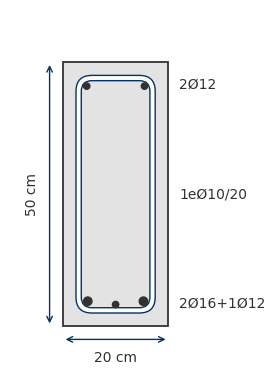

In [2]:
# Set bottom longitudinal reinforcement
beam.set_longitudinal_rebar_bot(n1=2, d_b1=16 * mm, n2=1, d_b2=12 * mm)

# Set top longitudinal reinforcement
beam.set_longitudinal_rebar_top(n1=2, d_b1=12 * mm)

# Set transverse reinforcement (stirrups)
beam.set_transverse_rebar(n_stirrups=1, d_b=10 * mm, s_l=20 * cm)

# Plot the beam geometry and reinforcement
beam.plot()

**Define list of forces applied to the beam**

In [3]:
# Define forces
f1 = Forces(label="1.4D", V_z=50 * kN, M_y=80 * kNm)
f2 = Forces(label="1.2D+1.6L", V_z=55 * kN, M_y=-30 * kNm)
print(f1)
print(f2)

Force ID: 1, Label: 1.4D, N_x: 0.00 kN, V_z: 50.00 kN, M_y: 80.00 kN·m
Force ID: 2, Label: 1.2D+1.6L, N_x: 0.00 kN, V_z: 55.00 kN, M_y: -30.00 kN·m


**Create node and assign beam section and list of forces**

In [4]:
node_1 = Node(section=beam, forces=[f1, f2])
node_1

Node ID: 1 - Section label: 101
Forces Applied:
  - Force ID: 1, Label: 1.4D, N_x: 0.00 kN, V_z: 50.00 kN, M_y: 80.00 kN·m
  - Force ID: 2, Label: 1.2D+1.6L, N_x: 0.00 kN, V_z: 55.00 kN, M_y: -30.00 kN·m

**Perform shear and bending checks**

In [12]:
# Perform all checks
node_1.check()
# Print results in Markdown format
node_1.results

Beam 101, $b$=20.00 cm, $h$=50.00 cm, $c_{c}$=2.50 cm,                             Concrete C25, Rebar ADN 420.

Top longitudinal rebar: 2Ø12, $A_{s,top}$ = 2.26 cm², $M_u$ = -30 kNm, $\phi M_n$ = 38.29 kNm → $\color{#439b00}{\text{DCR}=0.78}$ 

Bottom longitudinal rebar: 2Ø16+1Ø12, $A_{s,bot}$ = 5.15 cm², $M_u$ = 80 kNm, $\phi M_n$ = 84.13 kNm → $\color{#efc200}{\text{DCR}=0.95}$ 

Shear reinforcing 1eØ10/20 cm, $A_v$=7.85 cm²/m, $V_u$=55 kN, $\phi V_n$=171.49 kN → $\color{#439b00}{\text{DCR}=0.32}$ 

In [6]:
# Print shear results in more detailed format in a DataFrame
node_1.check_shear()

,Label,Comb.,"Av,min","Av,req",Av,Vu,Nu,ØVc,ØVs,ØVn,ØVmax,Vu≤ØVmax,Vu≤ØVn,DCR
0,,,cm²/m,cm²/m,cm²/m,kN,kN,kN,kN,kN,kN,,,
1,101,1.4D,1.67,1.67,7.85,50,0,58.32,113.17,171.49,284.76,True,True,0.292
2,101,1.2D+1.6L,1.67,1.67,7.85,55,0,58.32,113.17,171.49,284.76,True,True,0.321


In [7]:
# Print flexure results in more detailed format in a DataFrame
node_1.check_flexure()

,Label,Comb.,Position,"As,min","As,req top","As,req bot",As,Mu,ØMn,Mu≤ØMn,DCR
0,,,,cm²,cm²,cm²,cm²,kNm,kNm,,
1,101,1.4D,Bottom,3.05,0.0,4.88,5.15,80,84.13,True,0.951
2,101,1.2D+1.6L,Top,3.06,2.35,0.0,2.26,-30,38.29,True,0.784


**Export table results to Excel**

In [8]:
node_1.check_shear().to_excel("ACI 318-19 shear_results.xlsx")
node_1.check_flexure().to_excel("ACI 318-19 flexure_results.xlsx")

**View complete and detailed results for the limiting case of the list of forces**

In [9]:
# View detailed shear results
node_1.shear_results_detailed()

===== BEAM SHEAR DETAILED RESULTS =====
Materials                            Variable     Value  Unit
----------------------------------  ----------  -------  ------
Section Label                                       101
Concrete strength                       fc           25  MPa
Steel reinforcement yield strength      fy          420  MPa
Concrete density                        wc         2500  kg/m³
Normalweight concrete                   λ             1
Safety factor for shear                 Øv         0.75 

Geometry                     Variable     Value  Unit
--------------------------  ----------  -------  ------
Section height                  h            50  cm
Section width                   b            20  cm
Clear cover                     cc          2.5  cm
Longitudinal tension rebar      As         2.26  cm² 

Design forces                     Variable     Value  Unit
-------------------------------  ----------  -------  ------
Axial, positive for compression      N

In [10]:
# View detailed flexure results
node_1.flexure_results_detailed()

===== BEAM FLEXURE DETAILED RESULTS =====
Materials                            Variable     Value  Unit
----------------------------------  ----------  -------  ------
Section Label                                       101
Concrete strength                       fc           25  MPa
Steel reinforcement yield strength      fy          420  MPa 

Geometry                  Variable     Value  Unit
-----------------------  ----------  -------  ------
Section height               h            50  cm
Section width                b            20  cm
Clear cover                  cc          2.5  cm
Mechanical top cover       cm,top        4.1  cm
Mechanical bottom cover    cm,bot       4.26  cm 

Design_forces       Variable     Value  Unit
-----------------  ----------  -------  ------
Top max moment       Mu,top        -30  kNm
Bottom max moment    Mu,bot         80  kNm 

Check                     Unit     Value  Min.    Max.    Ok?
-----------------------  ------  -------  ------  ------ 

**Export detailed results to a Word document**

In [11]:
node_1.shear_results_detailed_doc()
node_1.flexure_results_detailed_doc()